# **Import Libary**

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# **Load Image**

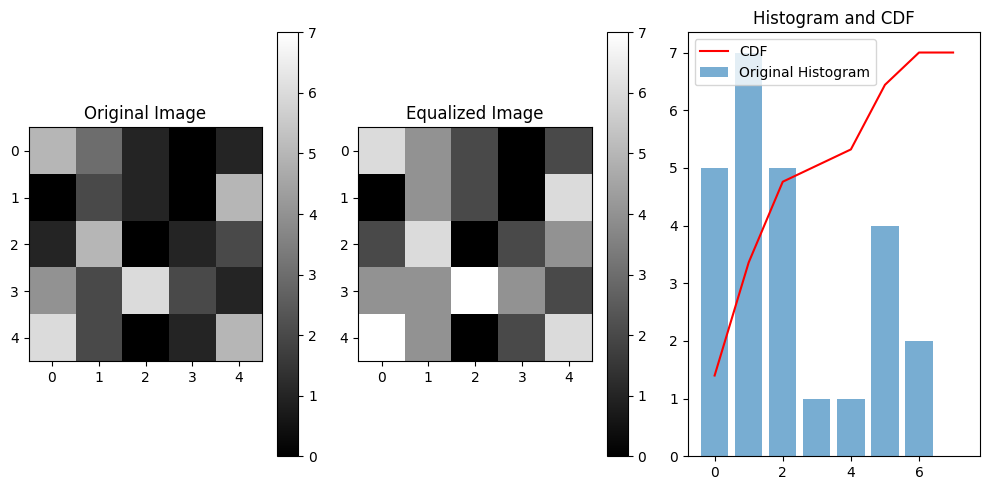

Equalized Pixel Values:
[[6 4 2 0 2]
 [0 4 2 0 6]
 [2 6 0 2 4]
 [4 4 7 4 2]
 [7 4 0 2 6]]


In [3]:
# สร้างภาพ 5x5 จากข้อมูลพิกเซลที่ให้มา (ค่าความเข้มแสง 3 บิต)
pixel_values = [5, 3, 1, 0, 1,
                0, 2, 1, 0, 5,
                1, 5, 0, 1, 2,
                4, 2, 6, 2, 1,
                6, 2, 0, 1, 5]

image = np.array(pixel_values, dtype=np.uint8).reshape(5, 5)

# คำนวณ histogram
hist, bins = np.histogram(image.flatten(), bins=8, range=[0, 7])

# คำนวณ CDF
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# คำนวณ mapping ใหม่
cdf_m = np.ma.masked_equal(cdf, 0)  # mask ค่าที่เป็น 0
cdf_m = (cdf_m - cdf_m.min()) * 7 / (cdf_m.max() - cdf_m.min())  # scale ค่าช่วง 0-7
cdf = np.ma.filled(cdf_m, 0).astype(np.uint8)

# แปลงภาพต้นฉบับด้วย mapping ใหม่
equalized_image = cdf[image]

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=7)  # 3-bit image: range 0-7
plt.title("Original Image")
plt.colorbar()

# แสดงผล Histogram Equalized Image
plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray', vmin=0, vmax=7)
plt.title("Equalized Image")
plt.colorbar()

# แสดง Histogram
plt.subplot(1, 3, 3)
plt.bar(range(8), hist, alpha=0.6, label="Original Histogram")
plt.plot(range(8), cdf_normalized, color='r', label="CDF")
plt.legend()
plt.title("Histogram and CDF")

plt.tight_layout()
plt.show()

# แสดงค่าความเข้มแสงของภาพหลังทำ Equalization
print("Equalized Pixel Values:")
print(equalized_image)
